In [1]:
#Imports etc
import matplotlib 
import numpy
import pylab
%matplotlib inline

Our goal today will be to study real LHC data. We processed it a bit for you, before you arrived.  We have picked out only events with at least two reconstructed leptons (electron or muon or antielectron or antimuon).  In every event we stored into a file the reconstructed energy and momentum of the most energetic two.

In [2]:
# First we have to open the file:
Events=numpy.loadtxt("Events.txt")

This file is a list of numbers reconstructed from each event by complicated software of the ATLAS detector.

Actually, with the full ATLAS event description, every event is described by around 100,000 numbers.  We pulled out only the 14 most useful numbers for this exercise.  In each event particle 1 is the reconstructed lepton with the highest pT, and particle 2 has the second highest.  The numbers we stored are:

0) event number

1) run number

2) particle 1 P_x

3) particle 1 P_y

4) particle 1 P_z

5) particle 1 E

6) particle 1 charge

7) particle 1 ID

8) particle 2 P_x

9) particle 2 P_y

10) particle 2 P_z

11) particle 2 E

12) particle 2 charge

13) particle 2 ID



The events are just stored in a big numpy array.  Lets see how many events there are:

In [3]:
print(len(Events))

16186


And lets look at the list of numbers in the first one:

In [4]:
print (Events[0])

[ 3.5612214e+07  2.1307900e+05  8.7624900e+01  6.8183800e+01
  3.7705800e+02  3.9306400e+02 -1.0000000e+00  1.3000000e+01
  1.0298200e+01  3.1087100e+00  3.0197100e+01  3.2056100e+01
  1.0000000e+00 -1.3000000e+01]


In [5]:
print (Events[9])

[ 5.8474488e+07  2.1296700e+05  1.4495800e+01 -1.0491400e+02
 -5.7264100e+02  5.8235200e+02 -1.0000000e+00  1.3000000e+01
  8.5092300e+00 -2.9264500e+01 -9.8184800e+01  1.0280600e+02
  1.0000000e+00 -1.3000000e+01]


In [6]:
# Exercise : Look up the energy of the highest pT lepton in the 
# 9th event (event number 9)

print("The energy is", Events[9,5], "GeV")


The energy is 582.352 GeV


In [7]:
print(Events[1000])

[ 6.2458574e+07  2.1296700e+05  1.2126300e+01 -2.2832600e+00
  5.2827100e+00  1.3423000e+01  1.0000000e+00 -1.3000000e+01
  9.8554700e+00  3.9862800e+00 -7.0487100e+00  1.2755600e+01
 -1.0000000e+00  1.1000000e+01]


In [8]:
# Exercise : Look up the charge of the second highest pT lepton 
# in the 1000th event


print("The charge is", Events[1000,6])


The charge is 1.0


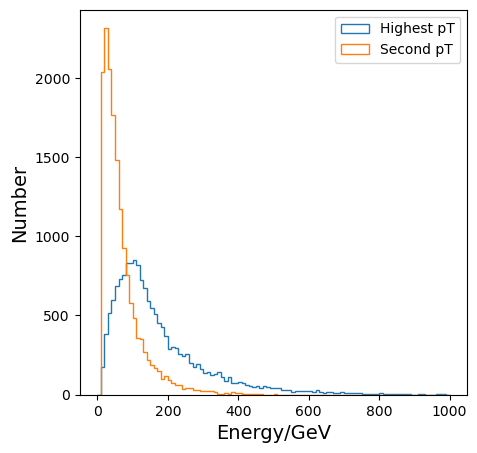

In [9]:
# Exercise : Histogram the energy of the highest pT leptons
#            Histogram the energy of the next highest pT leptons
#            use 100 bins between 0 and 1000 GeV
#            show both histograms on the same plot
#            label axes and add a legend

pylab.figure(figsize=(5,5))
pylab.hist(Events[:,5],label="Highest pT",histtype='step',bins=100, range=(0,1000))
pylab.hist(Events[:,11],label="Second pT",histtype='step',bins=100, range=(0,1000))
pylab.xlabel("Energy/GeV",fontsize=14)
pylab.ylabel("Number",fontsize=14)
pylab.legend(loc=1)
pylab.show()



In [10]:
# Exercise : How many events have first and second leptons with +ve charge?
#            How many with both -ve?
#            How many +-?  How many -+?
#            Which are the most common categories?


PlusPlus=0
MinusMinus=0
PlusMinus=0
MinusPlus=0

for E in Events:
    if E[6]==1 and E[12]==1:
        PlusPlus=PlusPlus+1
    if E[6]==-1 and E[12]==1:
        MinusPlus=MinusPlus+1
    if E[6]==1 and E[12]==-1:
        PlusMinus=PlusMinus+1
    if E[6]==-1 and E[12]==-1:
        MinusMinus=MinusMinus+1
print("++",PlusPlus)
print("+-",PlusMinus)
print("-+",MinusPlus)
print("--",MinusMinus)


++ 474
+- 7579
-+ 7737
-- 396


In particle physics we use special number codes for different particle types.  The list of codes is maintained by the Particle Data Group, so we call them PDG ID's.  Here is the full list of PDG IDs:

http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf

Look up the ID for electrons and muons, then try the next exercise. Note that particles have +ve PDG and antiparticles have negative ones.  You can turn them all positive using the abs() command.

In [11]:
# Exercise : Separate the events into three sets
#             1) Events with two muons or antimuons
#             2) Events with two electrons or positrons
#             3) Events with one muon/antimuon and one electron/positron
#            Put each set into a new list
#            How many are in each category?

MuonMuon=[]
MuonElec=[]
ElecElec=[]

for E in Events:
    if abs(E[7])==11 and abs(E[13])==11:
        ElecElec.append(E)
        if abs(E[7])==13 and abs(E[13])==13:
            MuonMuon.append(E)
    if (abs(E[7])==13 and abs(E[13])==11) or (abs(E[7])==11 and abs(E[13])==13):
            MuonElec.append(E)
print("Number of ee events", len(ElecElec))
print("Number of mumu events", len(MuonMuon))
print("Number of mue events", len(MuonElec))


Number of ee events 1366
Number of mumu events 0
Number of mue events 3655


In python, it is possible to save the array easily to a text file. For example, the line below re-saves the full events array to a text file called EventsNew.txt

In [12]:
numpy.savetxt("EventsNew.txt",Events)

In [13]:
# Exercise : Save to three text files, the contents of your separated
#            sets of particles.  We will use these tomorrow to search for 
#            new particles.

numpy.savetxt("ee.txt",ElecElec)
numpy.savetxt("mumu.txt",MuonMuon)
numpy.savetxt("emu.txt",MuonElec)

In [23]:
# Open exercise : Explore the LHC data! Make plots of various
#                  quantities and look for interesting effects.
#
#            Ideas:
#               Do events with two muons or two electrons have different
#                 properties to events with one of each?
#
#               What types of events have mostly same-charge particles in?
#
#               Do the energies of the same-sign events look similar
#                 to the energies of the different-sign events?




Events with Muons:
       event_number  run_number  particle1_Px  particle1_Py  particle1_Pz  \
0        35612214.0    213079.0      87.62490       68.1838      377.0580   
1       147584362.0    213092.0      27.27390      -60.2142      118.9270   
2        80305403.0    212687.0     -78.28890       35.0723       33.1956   
3        50397361.0    213130.0     149.12000       47.6874      -64.8383   
4       117846275.0    213130.0     -95.38500      -22.9044       34.9965   
...             ...         ...           ...           ...           ...   
16181   272495776.0    213039.0      -7.58781      172.5570     -130.9100   
16182    14624907.0    212619.0     116.15400      159.4690       38.6294   
16183   125291358.0    213092.0    -498.69800     -211.4990    -1061.2500   
16184    94687982.0    212993.0     105.45100       27.2500     -624.0190   
16185   152457982.0    213039.0      48.79850      127.8270     -203.7300   

       particle1_E  particle1_charge  particle1_ID  par

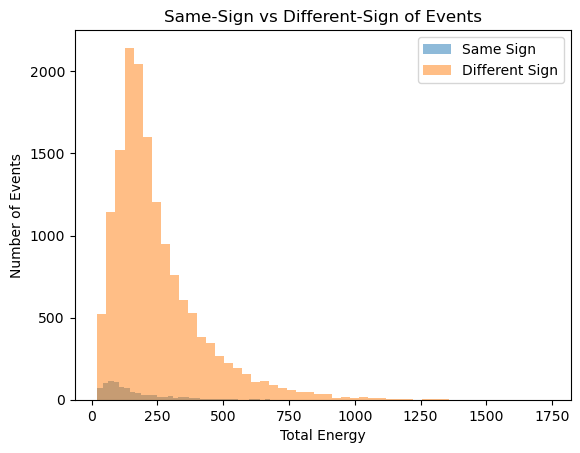

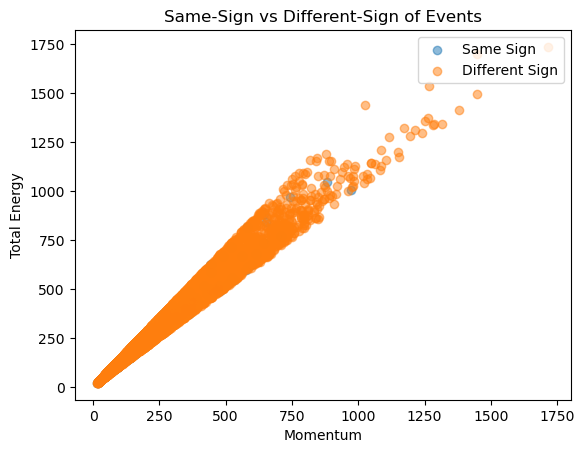

In [24]:
import numpy as np
import pandas as pd

# Step 1: Load the data
Events = np.loadtxt("Events.txt")

# Define column names
columns = ['event_number', 'run_number', 
           'particle1_Px', 'particle1_Py', 'particle1_Pz', 'particle1_E', 'particle1_charge', 'particle1_ID',
           'particle2_Px', 'particle2_Py', 'particle2_Pz', 'particle2_E', 'particle2_charge', 'particle2_ID']

# Step 2: Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(Events, columns=columns)

#Add a column for total energy and momentum of each event
df['total_energy'] = df['particle1_E'] + df['particle2_E']
df['momentum'] = np.sqrt(df['particle1_Px']**2 + df['particle1_Py']**2 + df['particle1_Pz']**2 + 
                         df['particle2_Px']**2 + df['particle2_Py']**2 + df['particle2_Pz']**2)

# Define particle IDs for muons and electrons
muon_id = 13
electron_id = 11

# Step 3: Filter based on particle IDs
muons = df[(df['particle1_ID'] == muon_id) | (df['particle2_ID'] == muon_id)]
electrons = df[(df['particle1_ID'] == electron_id) | (df['particle2_ID'] == electron_id)]

# Print the results to verify
print("\nEvents with Muons:")
print(muons)

print("\nEvents with Electrons:")
print(electrons)

# Step 4: Separate events with two muons, two electrons, and one of each
# Separate events with two muons
two_muons = df[((df['particle1_ID'] == muon_id) & (df['particle2_ID'] == muon_id))]

# Separate events with two electrons
two_electrons = df[((df['particle1_ID'] == electron_id) & (df['particle2_ID'] == electron_id))]

# Separate events with one muon and one electron
one_of_each = df[((df['particle1_ID'] == muon_id) & (df['particle2_ID'] == electron_id)) |
                 ((df['particle1_ID'] == electron_id) & (df['particle2_ID'] == muon_id))]

# Print the results to verify
print("\nEvents with Two Muons:")
print(two_muons)

print("\nEvents with Two Electrons:")
print(two_electrons)

print("\nEvents with One Muon and One Electron:")
print(one_of_each)


# Separate same-sign and different-sign events
same_sign = df[df['particle1_charge'] == df['particle2_charge']]
different_sign = df[df['particle1_charge'] != df['particle2_charge']]

# Extract energies for same-sign and different-sign events
same_sign_energies = same_sign['total_energy']
different_sign_energies = different_sign['total_energy']

# Create histograms to compare energies
plt.hist(same_sign_energies, bins=50, alpha=0.5, label='Same Sign')
plt.hist(different_sign_energies, bins=50, alpha=0.5, label='Different Sign')
plt.xlabel('Total Energy')
plt.ylabel('Number of Events')
plt.legend(loc='upper right')
plt.title('Same-Sign vs Different-Sign of Events')
plt.show()

# Scatter plot of energy vs momentum for same-sign and different-sign events
plt.scatter(same_sign['momentum'], same_sign['total_energy'], alpha=0.5, label='Same Sign')
plt.scatter(different_sign['momentum'], different_sign['total_energy'], alpha=0.5, label='Different Sign')
plt.xlabel('Momentum')
plt.ylabel('Total Energy')
plt.legend(loc='upper right')
plt.title('Same-Sign vs Different-Sign of Events')
plt.show()
